In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
tm=pd.read_csv('Temperature.csv', parse_dates=['Date'])
tm

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
tm.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [4]:
tm.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

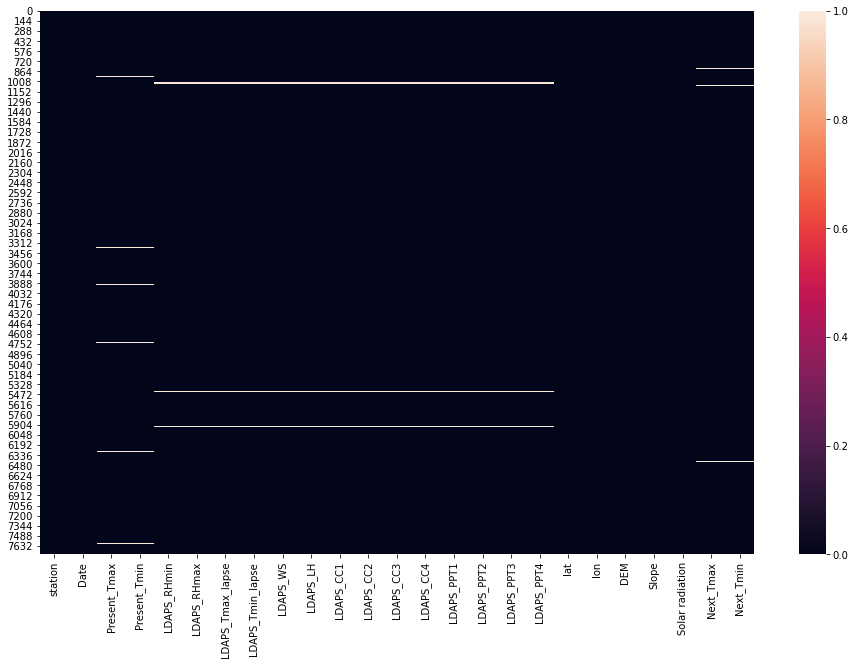

In [5]:
plt.figure(figsize=(16,10))
sns.heatmap(tm.isnull())

In [6]:
tm['station']=tm['station'].fillna(tm['station'].mean())
tm['Date']=tm['Date'].fillna(tm['Date'].mean())
tm['Present_Tmax']=tm['Present_Tmax'].fillna(tm['Present_Tmax'].mean())
tm['Present_Tmin']=tm['Present_Tmin'].fillna(tm['Present_Tmin'].mean())
tm['LDAPS_RHmin']=tm['LDAPS_RHmin'].fillna(tm['LDAPS_RHmin'].mean())
tm['LDAPS_RHmax']=tm['LDAPS_RHmax'].fillna(tm['LDAPS_RHmax'].mean())
tm['LDAPS_Tmax_lapse']=tm['LDAPS_Tmax_lapse'].fillna(tm['LDAPS_Tmax_lapse'].mean())
tm['LDAPS_Tmin_lapse']=tm['LDAPS_Tmin_lapse'].fillna(tm['LDAPS_Tmin_lapse'].mean())
tm['LDAPS_WS']=tm['LDAPS_WS'].fillna(tm['LDAPS_WS'].mean())
tm['LDAPS_LH']=tm['LDAPS_LH'].fillna(tm['LDAPS_LH'].mean())
tm['LDAPS_CC1']=tm['LDAPS_CC1'].fillna(tm['LDAPS_CC1'].mean())
tm['LDAPS_CC2']=tm['LDAPS_CC2'].fillna(tm['LDAPS_CC2'].mean())
tm['LDAPS_CC3']=tm['LDAPS_CC3'].fillna(tm['LDAPS_CC3'].mean())
tm['LDAPS_CC4']=tm['LDAPS_CC4'].fillna(tm['LDAPS_CC4'].mean())
tm['LDAPS_PPT1']=tm['LDAPS_PPT1'].fillna(tm['LDAPS_PPT1'].mean())
tm['LDAPS_PPT2']=tm['LDAPS_PPT2'].fillna(tm['LDAPS_PPT2'].mean())
tm['LDAPS_PPT3']=tm['LDAPS_PPT3'].fillna(tm['LDAPS_PPT3'].mean())
tm['LDAPS_PPT4']=tm['LDAPS_PPT4'].fillna(tm['LDAPS_PPT4'].mean())
tm['Next_Tmax']=tm['Next_Tmax'].fillna(tm['Next_Tmax'].mean())
tm['Next_Tmin']=tm['Next_Tmin'].fillna(tm['Next_Tmin'].mean())

or we could use loop as below,
df=tm.isnull().sum()
col=tm.columns
for i in range(len(df)):
    if(df[i]>0):
        tm[col[i]]=tm[col[i]].fillna(tm[col[i]].mean())

In [7]:
tm.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [8]:
tp=pd.DataFrame()
tp['Month']=tm['Date'].dt.month_name()

In [9]:
tp.head(10)

,Month
0,June
1,June
2,June
3,June
4,June
5,June
6,June
7,June
8,June
9,June


we will use the month column and convert it into the numerical form using LabelEncoder and then concat it with the 
original dataset of tm, it will help us analyse the dataset accoriding to month.

In [10]:
te=pd.concat([tm,tp], axis=1)

In [11]:
te

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
0,1.0,2013-06-30 00:00:00.000000000,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,June
1,2.0,2013-06-30 00:00:00.000000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,June
2,3.0,2013-06-30 00:00:00.000000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,June
3,4.0,2013-06-30 00:00:00.000000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,June
4,5.0,2013-06-30 00:00:00.000000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30 00:00:00.000000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,August
7748,24.0,2017-08-30 00:00:00.000000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,August
7749,25.0,2017-08-30 00:00:00.000000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,August
7750,13.0,2015-07-30 21:36:00.000002560,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,July


In [12]:
tu=te.drop(['Date'], axis=1)

In [13]:
tu.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,June
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,June
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,June
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,June
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,June


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tu['Month']=le.fit_transform(tu['Month'])

In [15]:
tu.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2


In [16]:
tu.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,0.532379
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,0.530318
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,0.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,0.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,1.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,1.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2.000000


In [17]:
tu.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
station,1.000000e+00,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,...,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293,-5.993246e-20
Present_Tmax,1.126554e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,...,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741,-1.460122e-01
Present_Tmin,1.316462e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,...,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670,-8.755494e-02
LDAPS_RHmin,-6.673316e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019,1.890234e-01
LDAPS_RHmax,-1.669845e-01,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997,1.175143e-01
LDAPS_Tmax_lapse,6.910718e-02,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868,-9.745087e-02
LDAPS_Tmin_lapse,1.047582e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176,-2.353868e-02
LDAPS_WS,5.277000e-03,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576,1.121275e-01
LDAPS_LH,-1.333566e-01,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440,-6.562730e-02
LDAPS_CC1,6.918787e-03,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028,2.095374e-01


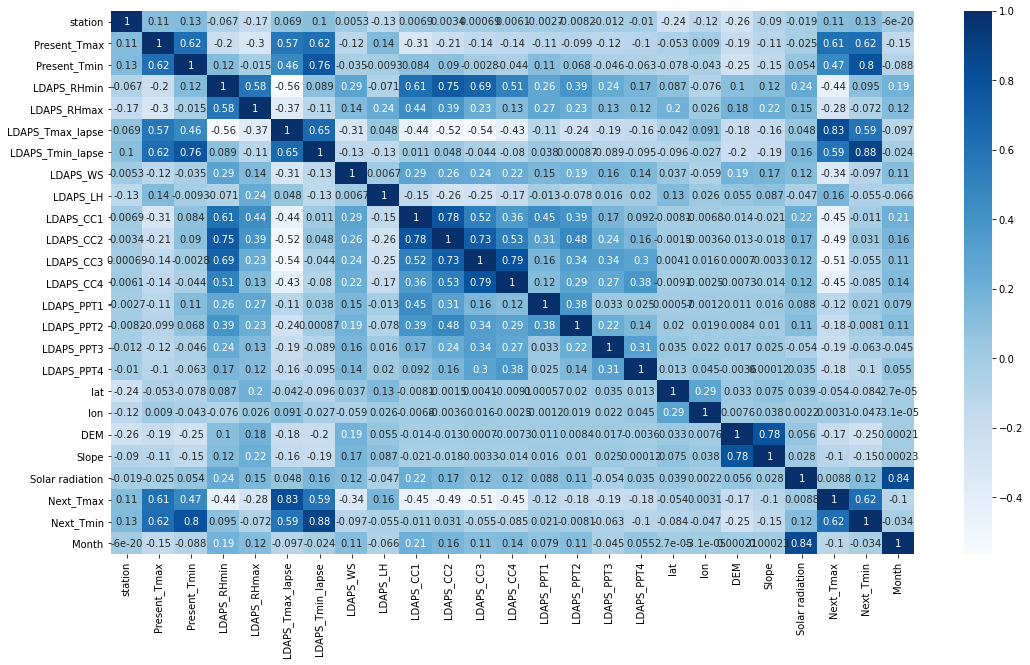

In [18]:
plt.figure(figsize=(18,10))
sns.heatmap(tu.corr(), cmap='Blues', annot=True)

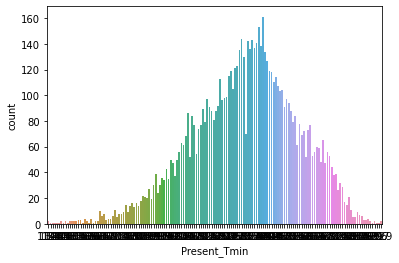

In [19]:
sns.countplot(tu['Present_Tmin'])

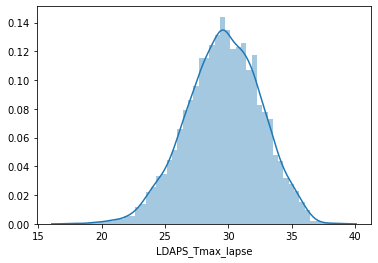

In [20]:
sns.distplot(tu['LDAPS_Tmax_lapse'])

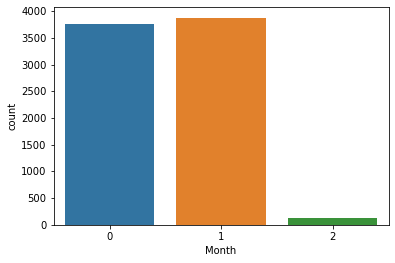

In [21]:
sns.countplot(tu['Month'])

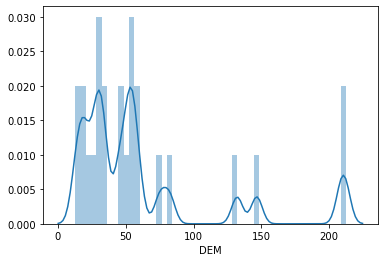

In [22]:
sns.distplot(tu['DEM'])

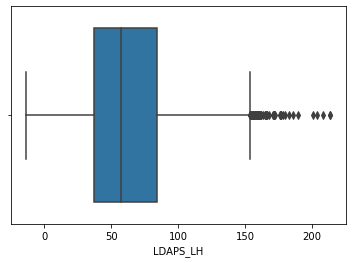

In [23]:
sns.boxplot(tu['LDAPS_LH'])

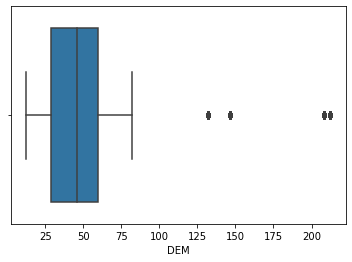

In [24]:
sns.boxplot(tu['DEM'])

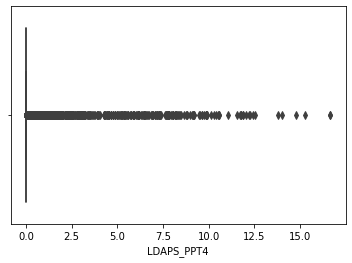

In [25]:
sns.boxplot(tu['LDAPS_PPT4'])

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(tu))
tr=tu[(z<3).all(axis=1)]
tr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,0


In [27]:
tr.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
Month               0.192910
dtype: float64

In [28]:
tt=tr.copy()

In [29]:
tt['LDAPS_PPT1']=np.log1p(tt['LDAPS_PPT1'])
tt['LDAPS_PPT2']=np.log1p(tt['LDAPS_PPT2'])
tt['LDAPS_PPT3']=np.log1p(tt['LDAPS_PPT3'])
tt['LDAPS_PPT4']=np.log1p(tt['LDAPS_PPT4'])
tt['DEM']=np.log1p(tt['DEM'])
tt['Slope']=np.log1p(tt['Slope'])
tt['LDAPS_WS']=np.log1p(tt['LDAPS_WS'])

In [30]:
tt['LDAPS_PPT1']=np.log1p(tt['LDAPS_PPT1'])
tt['LDAPS_PPT2']=np.log1p(tt['LDAPS_PPT2'])
tt['LDAPS_PPT3']=np.log1p(tt['LDAPS_PPT3'])
tt['LDAPS_PPT4']=np.log1p(tt['LDAPS_PPT4'])

(array([2510., 1379., 1380.,  560.,    0.,  279.,  256.,    0.,    0.,
         530.]),
 array([ 12.37  ,  32.3665,  52.363 ,  72.3595,  92.356 , 112.3525,
        132.349 , 152.3455, 172.342 , 192.3385, 212.335 ]),
 <a list of 10 Patch objects>)

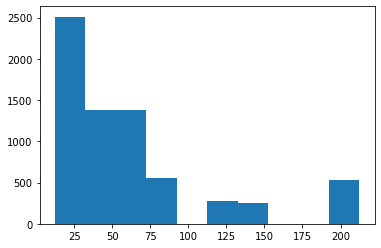

In [31]:
plt.hist(tr['DEM'])

(array([ 557.,  840.,  558., 1103.,  831., 1380.,  560.,    0.,  535.,
         530.]),
 array([2.59301339, 2.86999842, 3.14698345, 3.42396848, 3.70095351,
        3.97793855, 4.25492358, 4.53190861, 4.80889364, 5.08587867,
        5.3628637 ]),
 <a list of 10 Patch objects>)

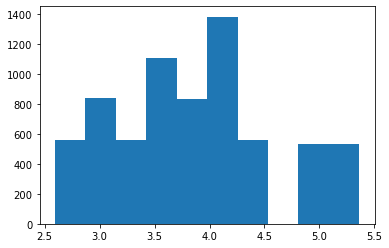

In [32]:
plt.hist(tt['DEM'])

(array([3338., 1092.,  566.,  282.,  550.,  542.,    0.,    0.,    0.,
         524.]),
 array([0.0985 , 0.60647, 1.11444, 1.62241, 2.13038, 2.63835, 3.14632,
        3.65429, 4.16226, 4.67023, 5.1782 ]),
 <a list of 10 Patch objects>)

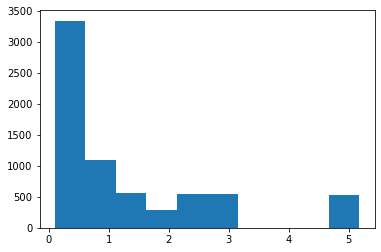

In [33]:
plt.hist(tr['Slope'])

(array([1946.,  837., 1367.,  280.,  566.,  282.,  550.,  542.,    0.,
         524.]),
 array([0.09394561, 0.26665375, 0.43936188, 0.61207002, 0.78477815,
        0.95748629, 1.13019443, 1.30290256, 1.4756107 , 1.64831883,
        1.82102697]),
 <a list of 10 Patch objects>)

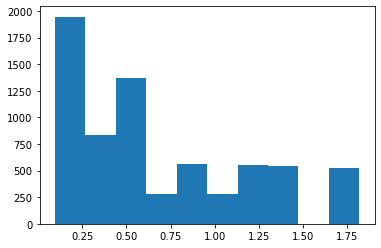

In [34]:
plt.hist(tt['Slope'])

In [35]:
x=tt.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
y=tt.iloc[:,22]

In [36]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)
x

array([[-1.6719535 , -0.43361467, -0.8284707 , ...,  1.33330645,
         1.55206749,  2.79903745],
       [-1.5330388 ,  0.68756737, -0.74176307, ..., -0.50116334,
         1.25787504,  2.79903745],
       [-1.3941241 ,  0.58245655, -0.00474815, ..., -0.85931758,
         1.2441708 ,  2.79903745],
       ...,
       [ 1.38416996, -2.32560937, -2.6926849 , ..., -1.04250875,
        -2.13673686, -0.99539067],
       [ 1.52308466, -2.32560937, -2.43256199, ..., -0.92980918,
        -2.14849763, -0.99539067],
       [ 1.66199936, -2.36064631, -2.56262344, ..., -0.85111117,
        -2.11761834, -0.99539067]])

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
max_scr=0
for rstate in range(1,46):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate, test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_y=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred_y)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for the rstate', rstate,'to max r2 scr is',max_scr)

The corresponding value for the rstate 45 to max r2 scr is 0.7686451410046461


In [38]:
from sklearn.model_selection import cross_val_score
crs_val_scr=cross_val_score(lr,x,y,scoring='r2', cv=10).mean()
crs_val_scr

0.6154098575185636

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000]}
grrb=GridSearchCV(gbr,parameters,cv=5)
grrb.fit(x,y)
grrb.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [40]:
gbr=GradientBoostingRegressor(learning_rate=0.01, n_estimators=500)
print('The cross Val Score',cross_val_score(gbr,x,y,cv=5, scoring='r2').mean())

The cross Val Score 0.681384624278867


In [41]:
gbr=GradientBoostingRegressor(learning_rate=0.01, n_estimators=500)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_y=gbr.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)

r2 score 0.7927011829490473


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
0.6655914984382001
{'alpha': 0.01}
0.6680851558657162


In [43]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_y=ls.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print('mean sqaured error', mean_squared_error(y_test,pred_y))

r2 score 0.7343765540948888
mean sqaured error 2.3770462105829098


In [44]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_y=rd.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print('mean sqaured error', mean_squared_error(y_test,pred_y))

r2 score 0.7357316686138011
mean sqaured error 2.36491938261744


In [45]:
df1=pd.DataFrame(pred_y)
df1.to_csv('gbr_prediction.csv')

In [46]:
import joblib
joblib.dump(gbr,'gbr_Temperature.pkl')

['gbr_Temperature.pkl']